# Incidenti aerei

Il dataset riporta gli incidenti aerei avvenuti dalgli anni `1908` fino al `2009` riportando vari campi come: l'operatore che ha effettuato il volo, la data e l'ora del volo, il numero identificativo del volo e altri campi. <br>
Osserviamo ora i valori dei campi dalla tabella sottostante.

In [1]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import date, timedelta, datetime

Data = pd.read_csv('./archive/Airplane_Crashes_and_Fatalities_Since_1908.csv')

np.random.seed(42) 
obs, feat = Data.shape #Obs number of tuple while in feat number of columns 
Data.sample(5)

,Date,Time,Location,Operator,Flight #,Route,Type,Registration,cn/In,Aboard,Fatalities,Ground,Summary
4793,07/30/2001,16:00,"Haines, Alaska",Air Taxi,NaN,"Shagway, AK - Return",Piper PA-32-300,N39586,32-7840168,6.0,6.0,0.0,The sightseeing plane impacted the side of a m...
5020,11/28/2004,09:55,"Montrose, Colorado",Glow Air/Air Castle - Charter,73,"Montrose, CO - South Bend, IN",Canadair CL-601-2A12 Challenger,N873G,3009,6.0,3.0,0.0,"While attempting to take off from R31, the air..."
655,06/20/1944,NaN,"Porto Alegre, Brazil",Varig,NaN,NaN,Lockheed 10C Electra,PP-VAG,1008,10.0,10.0,0.0,Crashed into a river.
1874,10/09/1963,NaN,"Near Marseilles, France",Aeronaves de Panama,NaN,"Marseilles, France - Dhah, Saudi Arabia",Douglas C-74,HP-385,13915,6.0,6.0,0.0,Crashed shortly after taking off with a cargo ...
2318,06/05/1969,07:12,"North Bend, Oregon",Eureka Aero Inc. - Air Taxi,NaN,NaN,Cessna 337C,N2665S,NaN,3.0,3.0,0.0,Collided with trees on approach. Improper IFR ...


In [15]:
print(str("Il dataset consiste in " + str(obs) + " osservazioni (schianti) e " + str(feat) + " colonne. Le colonne sono le seguenti:"))

Il dataset consiste in 5268 osservazioni (schianti) e 13 colonne. Le colonne sono le seguenti:


- **Date** (data dell'incidente che ha avuto luogo)
- **Time** (tempo dell'incidente che ha avuto luogo)
- **Location** (luogo dell'incidente)
- **Operator** (Operatore del volo)
- **Flight #** (Numero del volo)
- **Route** (Rotta della tratta del volo)
- **Type** (Tipo di aereo)
- **Registration** (Numero dell'aereo)
- **cn/In** (?)
- **Aboard** (Persone totali a bordo dell'aereo)
- **Fatalities** (Persone morte nell'incidente)
- **Ground** (Non ha senso dato che dovrebbe essere Aboard = Fatalities + Ground ma non è così)
- **Summary** (breve riassunto della dinamica dell'incidente)

Come possiamo vedere, il dataset è composta da `13 colonne` che tuttavia presentano alcuni buchi (*valori nulli*) per ogni riga. <br>
Il numero totale dei valori nulli presenti nel dataset sono stati raggruppati per colonne e il risultato è il seguente:

In [3]:
Data.isnull().sum()

Date               0
Time            2219
Location          20
Operator          18
Flight #        4199
Route           1706
Type              27
Registration     335
cn/In           1228
Aboard            22
Fatalities        12
Ground            22
Summary          390
dtype: int64

È possible notare che nella colonna riguradante il **numero del volo**, sono contenuti più valori nulli rispetto a tutte le altre colonne; seguono in ordine la colonna del tempo e quella della rotta.

In [4]:
#cleaning up by replacing the old incorrect value time with the new one
Data['Time'] = Data['Time'].replace(np.nan, '00:00') 
Data['Time'] = Data['Time'].str.replace('c: ', '')
Data['Time'] = Data['Time'].str.replace('c:', '')
Data['Time'] = Data['Time'].str.replace('c', '')
Data['Time'] = Data['Time'].str.replace('12\'20', '12:20')
Data['Time'] = Data['Time'].str.replace('0943', '09:43')
Data['Time'] = Data['Time'].str.replace('22\'08', '22:08')
Data['Time'] = Data['Time'].str.replace('114:20', '14:20')

Data['Time'] = Data['Date'] + ' ' + Data['Time'] #joining two rows (data and time)
def todate(x):
    return datetime.strptime(x, '%m/%d/%Y %H:%M') #select the format to display
Data['Time'] = Data['Time'].apply(todate) #convert to date type

#print('Range di date a partire da ' + str(Data.Time.min()) + ' fino a ' + str(Data.Time.max()))

Data.Operator = Data.Operator.str.upper() #just to avoid duplicates like 'British Airlines' and 'BRITISH Airlines'

Una volta finito di ripulire i dati corrotti, vogliamo visualizzare il numero di incidenti aerei per ogni anno, partendo dal primo anno disponibile fino ad arrivare all'ultimo.

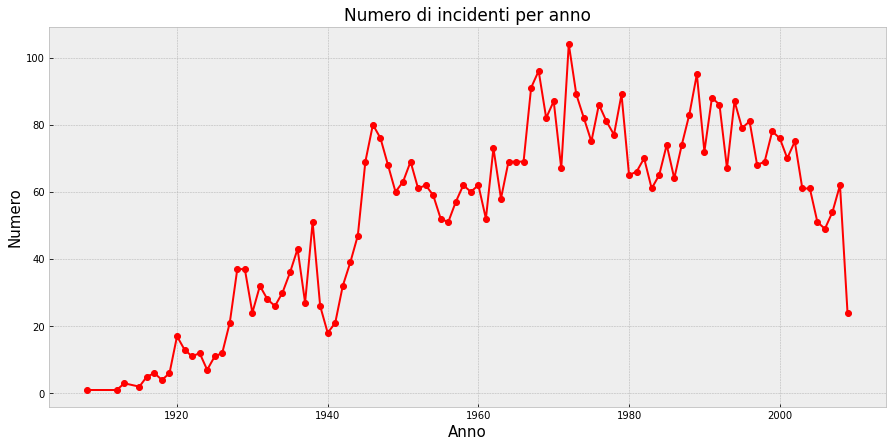

In [5]:
Temp = Data.groupby(Data.Time.dt.year)[['Date']].count() #Temp is going to be temporary data frame with only 1 column Date that contains, for every year, the counts of planes crashed
Temp = Temp.rename(columns={"Date": "Count"}) #Renaming the name of the only Date column into Count

plt.figure(figsize=(15,7))
plt.style.use('bmh')
plt.plot(Temp.index, 'Count', data=Temp, color='red', marker = "o", linewidth=2)
plt.xlabel('Anno', fontsize=15)
plt.ylabel('Numero', fontsize=15)
plt.title('Numero di incidenti per anno', loc='Center', fontsize=17)
plt.show()

Come notiamo dal grafico, a partire dal `2001`, c'è stata una riduzione progressiva di incidenti fino al `2006` per poi veder risalire il numero di incidenti nei due anni successivi e per finire, un drastico calo nell'ultimo anno. <br>
L'anno con il numero di incidenti più alto, con un valore superiore a **100**, è il `1972`, mentre quello con il numero più basso,con un valore pari a **1**, è il `1908` o il `1912`.

### Tipo di volo

In [6]:
Temp = Data.copy()
Temp['isMilitary'] = Temp.Operator.str.contains('MILITARY')
Temp = Temp.groupby('isMilitary')[['isMilitary']].count()
Temp.index = ['Passenger', 'Military']

Temp2 = Data.copy()
Temp2['Military'] = Temp2.Operator.str.contains('MILITARY')
Temp2['Passenger'] = Temp2.Military == False
Temp2 = Temp2.loc[:, ['Time', 'Military', 'Passenger']] # dataframe with Index Time Military Passenger
Temp2 = Temp2.groupby(Temp2.Time.dt.year)[['Military', 'Passenger']].aggregate(np.count_nonzero) # group by years omitting the null (false) count

Osserviamo che il dataset è diviso in **per tipo di volo**: i *voli di linea* e i *voli militari*. <br>
Ora proviamo a vedere i due grafici: il primo riguardante il numero di incidenti mentre il secondo gli anni in cui si sono verificati.

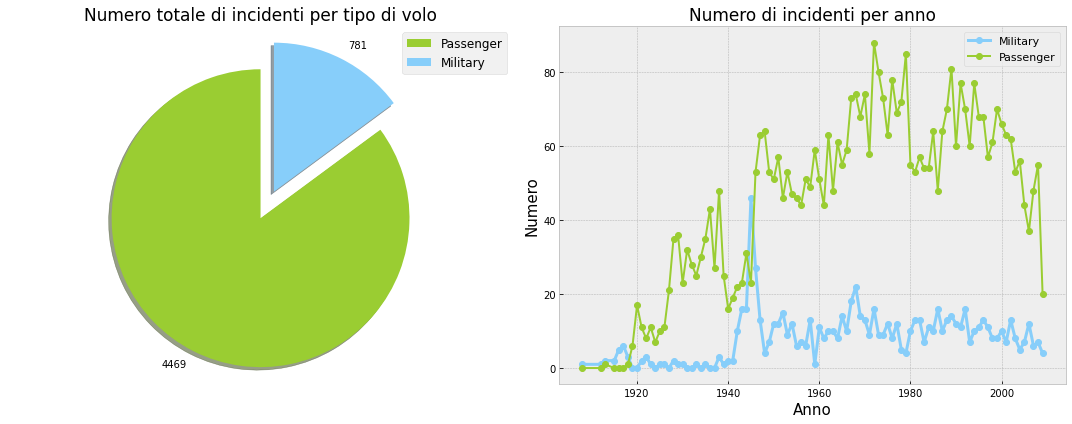

In [7]:
colors = ['yellowgreen', 'lightskyblue']
plt.figure(figsize=(15,6))
plt.subplot(1, 2, 1)
patches, texts = plt.pie(Temp.isMilitary, colors=colors, labels=Temp.isMilitary, startangle=90, shadow = True, explode={0.2, 0.0})
plt.legend(patches, Temp.index, loc="best", fontsize=12)
plt.axis('equal')
plt.title('Numero totale di incidenti per tipo di volo', loc='Center', fontsize=17)

plt.subplot(1, 2, 2)
plt.style.use('bmh')
plt.plot(Temp2.index, 'Military', data=Temp2, color='lightskyblue', marker = "o", linewidth=3)
plt.plot(Temp2.index, 'Passenger', data=Temp2, color='yellowgreen', marker = "o", linewidth=2)
plt.legend(fontsize=11)
plt.xlabel('Anno', fontsize=15)
plt.ylabel('Numero', fontsize=15)
plt.title('Numero di incidenti per anno', loc='Center', fontsize=17)
plt.tight_layout()
plt.show()

Come si può notare, il numero di incidenti dei voli militari è nettamente minore rispetto al numero di incidenti dei voli di linea. <br>
Ora che abbiamo fatto la distinzione sul tipo di volo, proviamo a vedere quanto è la **percentuale dei morti** negli incidenti aerei, divisi per anno e per tipo di volo.

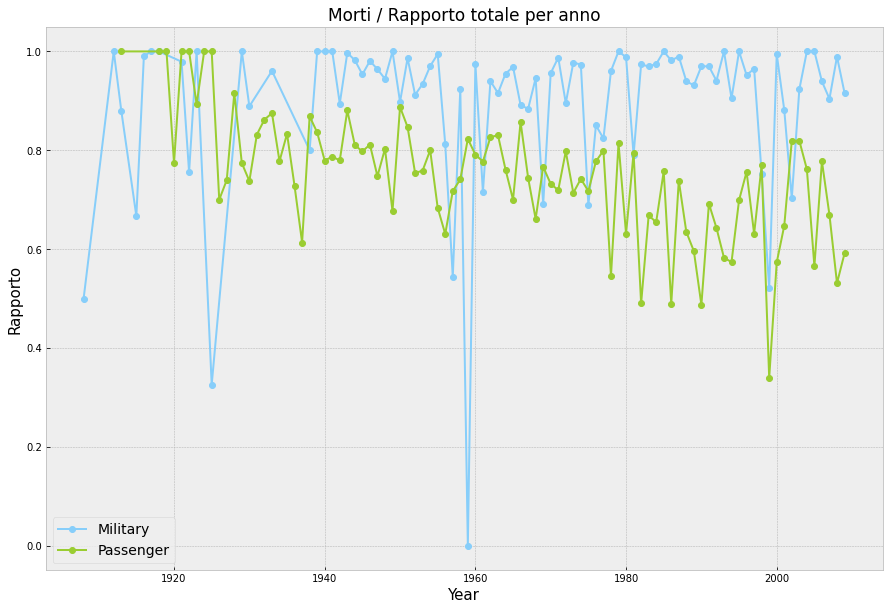

In [8]:
Temp2 = Data.copy()

Temp2['Military'] = Temp2.Operator.str.contains('MILITARY')
Temp2['Passenger'] = Temp2.Military == False
Temp2 = Temp2.loc[:, ['Time', 'Military', 'Passenger', 'Aboard', 'Fatalities']]
Temp2 = Temp2.groupby([Temp2.Time.dt.year,'Military', 'Passenger']).sum()[["Aboard", 'Fatalities']]

Temp2["Proportion"] = Temp2[["Fatalities"]]["Fatalities"] / Temp2[["Aboard"]]["Aboard"]

plt.figure(figsize=(15,10))
plt.style.use('bmh')
plt.plot(Temp2.loc[Temp2.index.get_level_values(1)].index.get_level_values(0), "Proportion", data=Temp2.loc[Temp2.index.get_level_values(1)], color='lightskyblue', marker = "o", linewidth=2)
plt.plot(Temp2.loc[Temp2.index.get_level_values(2)].index.get_level_values(0), "Proportion", data=Temp2.loc[Temp2.index.get_level_values(2)], color = 'yellowgreen', marker = "o", linewidth=2)
plt.legend(["Military", "Passenger"], fontsize=14)
plt.xlabel('Year', fontsize=15)
plt.ylabel('Rapporto', fontsize=15)
plt.title('Morti / Rapporto totale per anno', loc='Center', fontsize=17)
plt.show()


Si può osservare che il rapporto tra i morti e i passeggeri a bordo divisi per anno, è tendente all'`100%` (cioè al fatto che tutti i passeggeri sono morti) per i voli militari, mentre per i voli di linea il rapporto è più tendente al `70%`. <br>
Bisogna notare inoltre che per i voli di linea, più il tempo avanza e più il rapporto della mortalità diminuisce.

## Sono corrette le visualizzazione precedenti?

Pensiamo al fatto che il numero di incidenti nel 1908 siano minori rispetto al 2009, è possibile che in 100 anni le tecnologie non siano progredite secondo quanto affermato dai dati? <br>
Manca una componente fondamentale, non abbiamo tenuto conto del numero di voli che sono stati effettuati negli anni, è chiaro che nel 1908 ci siano stati molti meno voli rispetto al 2009, e quindi i grafici non mostrano la proporzione corretta sul numero totale dei voli per anno.<br>
Per rimediare, importiamo un nuovo dataset contenente il numero totale di voli o passeggeri divisi per anno.

In [9]:
Totals = pd.read_csv('./archive/API_IS.AIR.DPRT_DS2_en_csv_v2.csv')
Totals.sample(5)

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,Unnamed: 66
43,"Congo, Dem. Rep.",COD,"Air transport, registered carrier departures w...",IS.AIR.DPRT,NaN,NaN,NaN,NaN,NaN,NaN,...,1.144800e+04,1.158000e+04,12476.0,11513.0,18757.00,8.271000e+03,7532.000,3.787864e+03,NaN,NaN
69,Eritrea,ERI,"Air transport, registered carrier departures w...",IS.AIR.DPRT,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,539.0,714.0,919.00,1.018000e+03,1111.000,4.943950e+02,NaN,NaN
61,East Asia & Pacific (excluding high income),EAP,"Air transport, registered carrier departures w...",IS.AIR.DPRT,NaN,NaN,NaN,NaN,NaN,NaN,...,4.876787e+06,5.445124e+06,5872462.0,6431220.0,6919472.67,7.387204e+06,7629160.000,4.921887e+06,NaN,NaN
55,Germany,DEU,"Air transport, registered carrier departures w...",IS.AIR.DPRT,NaN,NaN,NaN,NaN,NaN,NaN,...,9.548740e+05,9.460820e+05,967453.0,962803.0,955827.00,9.226486e+05,896647.181,3.039660e+05,NaN,NaN
32,Bhutan,BTN,"Air transport, registered carrier departures w...",IS.AIR.DPRT,NaN,NaN,NaN,NaN,NaN,NaN,...,5.820000e+03,8.772000e+03,4640.0,6065.0,4215.00,5.187000e+03,5067.000,1.311000e+03,NaN,NaN


Come possiamo notare dalla tabella molti campi sono riempi con Nan value; per poter visualizzare i grafici, abbiamo bisogno di sostituirli con il valore`0`.

In [10]:
Totals = Totals.replace(np.nan, 0)
Years = Totals.copy();

In [11]:
Years = Years.drop(["Country Name", "Country Code", "Indicator Name", "Indicator Code"], axis = 1)
Years = Years.replace(np.nan, 0)
Years = pd.DataFrame(Years.sum())
Years = Years.drop(Years.index[0:10]) #Toglie i primi 9 anni che hanno valore pari a 0
Years = Years['1970':'2020']
Years.columns = ['Sum']
Years.index.name = 'Year'

> Come si evince dalla tabella, siccome i primi `10` anni hanno sempre valore pari a `0`, questi vengono omessi dalla visualizzazione.

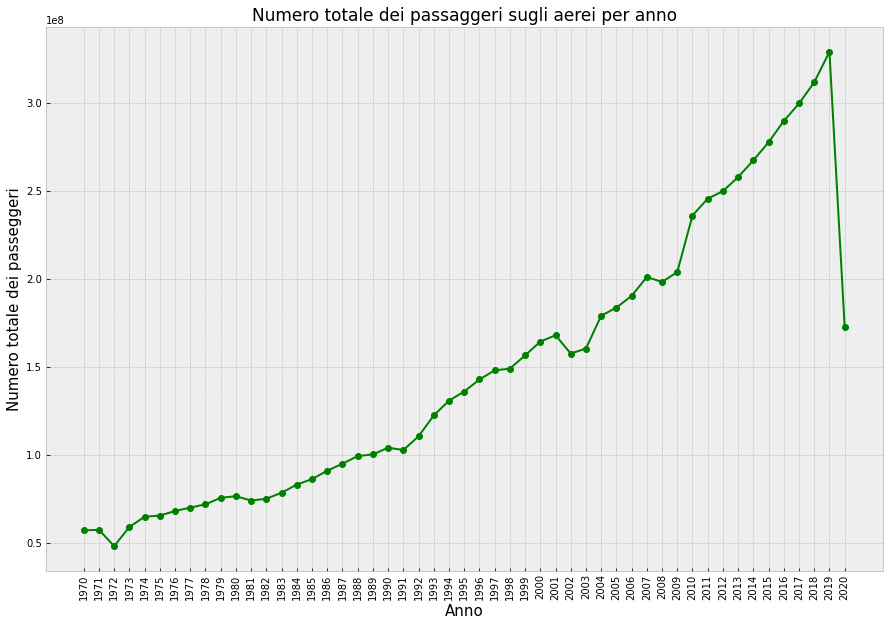

In [14]:
plt.figure(figsize=(15,10))

plt.style.use('bmh')
plt.plot(Years.index, 'Sum', data=Years, marker = "o", color = 'green', linewidth=2)
plt.xlabel('Anno', fontsize=15)
plt.ylabel('Numero totale dei passeggeri', fontsize=15)
plt.title('Numero totale dei passaggeri sugli aerei per anno', loc='Center', fontsize=17)
plt.xticks(rotation=90)
plt.show()

Come si può notare, dal `2019` fino al `2020`, il numero dei passeggeri è drasticamente ridotto rispetto all'anno precedente, questo perché in quel periodo c'è stata la pandemia che ha colpito in maniera molto dura il settore dell'aviazione. <br>
Purtroppo il dataset non mostrava nessun valore per il `2021`, quindi presumo che la decrescita del numero di passeggeri sia stata molto ripida anche per il suddetto anno.